# **Tarea 2. Análisis de Datos.**

## *Modelos Paramétricos, Regresión y Clasificación.*

**Profesor:** Ricardo Flores (rflores@inf.udec.cl), Manuel Pérez (maperezc@inf.udec.cl)<br>
**Ayudantes:** Jorge Saavedra (jsaavedra2018@udec.cl).

Fecha de entrega: **Lunes 14 de Octubre, 23:59 hrs.**

**¿Cómo?:** La tarea debe ser subida a la plataforma de classroom en un archivo con el formato **NombreApellido_T2.zip**. Este debe contener el código solicitado, junto con el conjunto de datos utilizado en formato **.csv**.

---

#### Normas del curso:
Antes de comenzar lea detenidamente las normas a aplicar en la evaluación de esta tarea.

- El horario límite para entregar la tarea es a las **23:59** de la fecha señalada en el encabezado. Entregas
posteriores a la fecha y hora indicada utilizan uno de sus días permitidos para atraso, en caso de no tener días
de atraso disponibles se asigna **nota mínima**. Es por esto que se le recomienda subir la tarea con anticipación.
- Cada respuesta debe ser explicada claramente sin dejar espacio a dobles interpretaciones. **El código de la tarea debe estar comentado.**
- Está bien discutir las respuestas con compañeros/as. Está bien buscar la respuesta en internet. Está bien asistir a clases donde comentaremos como resolver la tarea. **No está bien** entregar código escrito por otras personas ya sea compañeros, código obtenido por internet o incluso el código que el profesor programa en clases.
- **Todo código entregado debe ser escrito completamente por usted**. De lo contrario, su tarea será penalizada con la nota mínima.

---

#### ¿Cómo calculo mi nota?
- $\rm Nota_{T02}=(0.4*\rm Nota_{\rm reg})+(0.6*\rm Nota_{\rm clf}) + \rm Puntos_{\rm Bonus}$
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **$\bullet$ Regresión (40% Nota T02)**

Considere un problema de regresión, donde, a partir de un conjunto de datos $\{(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\cdots, (\boldsymbol{x}_N,y_N)\}$, se desea encontrar una función que prediga el valor $y = f(\boldsymbol{x}; \boldsymbol{\theta})$ para nuevos datos, donde $\boldsymbol{\theta}$ son los parámetros a ajustar del modelo. Considere un modelo de regresión lineal de $k$ parámetros

$\hat{y} = \sum_{i=1}^pa_ig_i(\boldsymbol{x}) + \sum_{i=p+1}^kb_{i-p}g_i(\boldsymbol{x})$,

en donde sabemos que los primeros $p$ parámetros $\{a_i\}_{i=1}^p$ siguen un prior normal, mientras que los siguientes $k-p$ parámetros $\{b_i\}_{i=1}^{k-p}$ utilizan un prior de Laplace. Asuma un error normal sobre las mediciones $y_i$. Note que los parámetros del modelo son entonces $\boldsymbol{\theta}=(a_1, \ldots, a_p, b_1, \ldots, b_{k-p})$

---

## **$\bullet$ Pregunta 1 (3.0 Puntos)**

Exprese matemáticamente el ajuste de maximum a-posteriori (MAP) del modelo de regresión lineal anteriormente mencionado a través de la minimización del negativo del logaritmo del posterior.

---

## **$\bullet$ Pregunta 2 (3.0 puntos)**

**Implementación**: Programe el ajuste del modelo de regresión lineal descrito anteriormente.

**IMPORTANTE**: Para las preguntas 2.1 y 2.2 no deberá utilizar métodos provenientes de otras librerías.

### **$\cdot$ Pregunta 2.1 (1.5 puntos)**

Calcule la derivada analítica de su función de costo en función de cada uno de los parámetros $\theta_i$. Para el caso de la derivada de la función de valor absoluto evaluada en cero,

### **$\cdot$ Pregunta 2.2 (1.5 puntos)**

Calcule la derivada los siguientes $k-p$ parámetros que siguen un prior de laplace de forma analítica con ayuda de la fórmula $ f(x) = \frac{f(x+h) - (x)}{h} $. Luego utilice el método del **gradiente descendiente** para obtener su derivada.

El gradiente descendiente es un método iterativo en el cual tenemos una iteracion $t$, existe un $w^t$ para el cual se quiere calcular el gradiente y se mueve hacia $w^{t+1}$ en la dirección contraria al gradiente, siempre dando pasos de tamaño $\alpha$.

- Se puede calcular con la siguiente fórmula: $ w^{t+1} = w^t - \alpha \nabla_w J(w^t)  $
    - $w^t$ : Corresponde al parámetro $w$ en la iteración $t$.
    - $\alpha$: Corresponde al learning rate.
    - $\nabla_w J(w^t)$: Corresponde al gradiente evaluado con el parámetro $w^t$.


### Evaluación

Su nota en este item se calculará utilizando la siguiente fórmula:

$\rm Nota_{\rm reg} = 1.0+ \rm Pte_{P1} + \rm Pte_{P2}$

# **$\bullet$ Clasificación (60% Nota T02)**

---
## **$\bullet$ Pregunta 1**

### Galaxy Zoo mini challenge

Galaxy Zoo es un sistema de clasificación de galaxias mediante crowdsourcing. Tiene cientos de miles de galaxias clasificadas de distintos telescopios. Uno de ellos es el Sloan Digital Sky Survey (SDSS) el cual contiene diversos atributos de cada galaxia. El objetivo de esta pregunta es entrenar un modelo de clasificación para galaxias espirales (disco con brazos espirales) y galaxias elipticas (forma aproximadamente elipsoidal) utilizando 85 atributos del SDSS.


Ejemplos de galaxias elípticas y espirales pueden ser vistos acá: http://zoo1.galaxyzoo.org/Tutorial.aspx

Para esto puede utilizar el archivo GZ_mini_challenge_train.csv incluido en esta tarea. Este archivo contiene el ID de la galaxia para efectos de este concurso ("ID"), el ID de la galaxia dentro del SDSS ("objID"), la proporción de personas que la clasificaron como elíptica ("p_el"), la proporción de personas que la clasificaron cono espiral ("p_cs"), la etiqueta ("label", donde 1 es espiral, 2 es eliptica y 0 es no decidible), y 85 atributos obtenidos del SDSS. En caso de que quiera ver alguna galaxia en particular puede usar el [SDSS explorer](http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx).

Una vez que tenga su modelo entrenado, debe aplicarlo sobre el conjunto de datos no etiquetados (data/GZ_mini_challenge_test.csv) y crear un archivo "predicted.csv" con dos columnas:
1. El ID de la galaxia
2. Sus etiquetas predichas para cada galaxia **(labels numéricas con el mismo código de numeración entregado previamente)**.

La forma de evaluar esta pregunta sera mediante el f1-score macro sobre sus predicciones en los datos no etiquetados.
* macro: calculado para cada etiqueta y utilizando su media no ponderada, de esta forma no se toma en cuenta el desbalanceo de las etiquetas

---


In [10]:
import pandas as pd
import pylab as pl
import numpy as np


df = pd.read_csv("data/GZ_mini_challenge_train.csv")
df.head()

,ID,mjd,z,zErr,zWarning,cx,cy,cz,sciencePrimary,legacyPrimary,...,extinction_i,extinction_z,dered_u,dered_g,dered_r,dered_i,dered_z,p_cs,p_el,label
0,1,53119,0.142862,0.000031,0,-0.947156,0.234806,0.218546,1,1,...,0.027516,0.020467,19.71417,17.89782,16.85166,16.32594,15.97762,0.118,0.794,2
1,2,53119,0.130709,0.000016,0,-0.947225,0.235187,0.217836,1,1,...,0.027918,0.020766,19.58643,17.75586,16.77871,16.31574,15.95822,0.361,0.611,2
2,3,53119,0.336631,0.000082,0,-0.949070,0.234849,0.210030,1,1,...,0.023559,0.017523,22.31949,20.26227,18.50848,17.94978,17.54792,0.113,0.521,2
3,4,53119,0.142885,0.000053,0,-0.947451,0.229448,0.222912,1,1,...,0.025687,0.019107,20.64116,18.75389,17.68335,17.22151,16.83896,0.081,0.839,2
4,5,53119,0.333033,0.000095,0,-0.946479,0.230773,0.225659,1,1,...,0.024715,0.018383,23.93892,20.46024,18.67124,18.09332,17.73189,0.100,0.733,2


---
### Evaluación

Su nota en este item se calculará utilizando la siguiente fórmula:

- $\rm Nota_{\rm clf} = 20\times f_1 - 5$.

De esta forma, si Ud. obtiene un $f_1$ menor que 0.3, obtendrá un 1.0, y si obtiene un $f_1$ sobre 0.6 obtendrá un 7.0. Además, los mejores 5 f1-score obtendrán automáticamente un punto adicional que se sumará al total de la nota de la tarea.

Pueden enviaranos **tres** predicciones en total previo a su entrega final y les devolveremos sus f1-scores en un máximo de dos días hábiles. Esta opción sólo puede ser utilizada hasta el sabado 12 de octubre.

---

# **$\bullet$ Regresión Lineal Bayesiana (Bonus, 1 punto sobre Nota T02)**

Considere un problema de regresión, donde, a partir de un conjunto de datos $\{(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\cdots, (\boldsymbol{x}_N,y_N)\}$, se desea encontrar una función que prediga el valor $y = f(\boldsymbol{x}; \boldsymbol{\theta})$ para nuevos datos, donde $\boldsymbol{\theta}$ son los parámetros a ajustar del modelo. Considere un modelo de regresión lineal de $k$ parámetros

$\hat{y} = \sum_{i=1}^k\theta_ig_i(\boldsymbol{x})$.

En clases utilizamos un modelo de regresión regularizado usando la maximización del posterior, dando los resultados de la regularizacion de Ridge para un prior normal y de lasso para un prior de Laplace. Con esto obtuvimos un estimador puntual para los parámetros $\boldsymbol{\theta}$ que maximiza la distribución a-posteriori. Sin embargo, en principio, podriamos modelar completamente la distribución a-posteriori y la distribución predictiva.

### **$\cdot$ Pregunta B.1 (0.35 puntos)**

Considere errores y prior normales

$p(y_i|\boldsymbol{x_i}, \boldsymbol{\theta}, C) \sim N (y_i|f(\boldsymbol{x_i}; \boldsymbol{\theta}), C)$,

$C = \begin{pmatrix}
\sigma_1^2 & 0 & \ldots & 0\\
0 & \sigma_2^2 & \ldots & 0\\
\vdots & \vdots & & \vdots\\
0 & 0 & \ldots & \sigma_N^2
\end{pmatrix}$

$p(\boldsymbol{\theta}| \boldsymbol{\mu}_\theta, C_\theta) \sim N (\boldsymbol{\theta}|\boldsymbol{\mu}_\theta, C_\theta)$,

donde $\boldsymbol{\mu}_\theta$ es la media y $C_\theta$ la matriz de covarianza. Demuestre que

$p(\boldsymbol{\theta}|\{\boldsymbol{x}_i,y_i\}_{i=1}^N, \boldsymbol{\mu}_\theta, C_\theta, C) \sim N (\boldsymbol{\theta}|\boldsymbol{\mu}_N, C_N)$,

donde

$\boldsymbol{\mu}_N = C_N(C_\theta^{-1}\boldsymbol{\mu}_\theta + M^TC^{-1}Y)$,

$C_N = (M^TC^{-1}M)^{-1} + C_\theta$,

$M = \begin{pmatrix}
g_1(x_1) & g_2(x_1) & \cdots & g_k(x_1)\\
g_1(x_2) & g_2(x_2) & \cdots & g_k(x_2)\\
\vdots & \vdots & & \vdots\\
g_1(x_N) & g_2(x_N) & \cdots & g_k(x_N)
\end{pmatrix}$,

$Y = \begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_N
\end{pmatrix}$.

### **$\cdot$ Pregunta B.2 (0.35 puntos)**

Considere $k = 2$, $g_1(x) = (1)$, $g_2(x) = x$, $\boldsymbol{\mu}_\theta = (0, 0)$ y

$C_\theta = \begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}$.

Grafique el prior.

In [3]:
# Grafique aquí el prior

Considere $k = 2$, $g_1(x) = (1)$ y $g_2(x) = x$ y los datos 1-D descritos a continuación. Utilizando el modelo Bayesiano de la pregunta B.1, grafique el posterior $p(\boldsymbol{\theta}|\{\boldsymbol{x}_i,y_i\}_{i=1}^N)$

<ErrorbarContainer object of 3 artists>

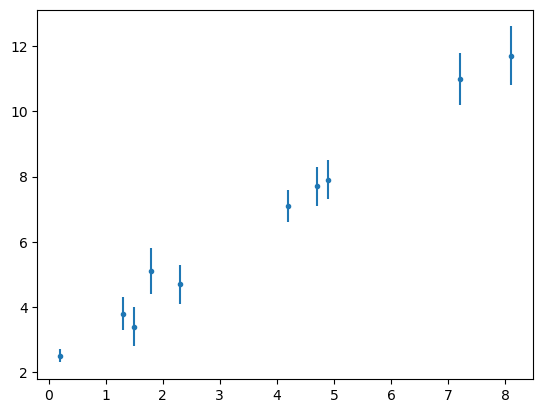

In [4]:
x = np.array([0.2, 1.3, 1.5, 1.8, 2.3, 4.2, 4.7, 4.9, 7.2, 8.1])
y = np.array([2.5, 3.8, 3.4, 5.1, 4.7, 7.1, 7.7, 7.9, 11, 11.7])
e = np.array([0.2, 0.5, 0.6, 0.7, 0.6, 0.5, 0.6, 0.6, 0.8, 0.9]) # error

plt.errorbar(x, y, yerr = e, ls = "", marker = ".")


Vuelva a graficar el posterior con los siguientes datos:

<ErrorbarContainer object of 3 artists>

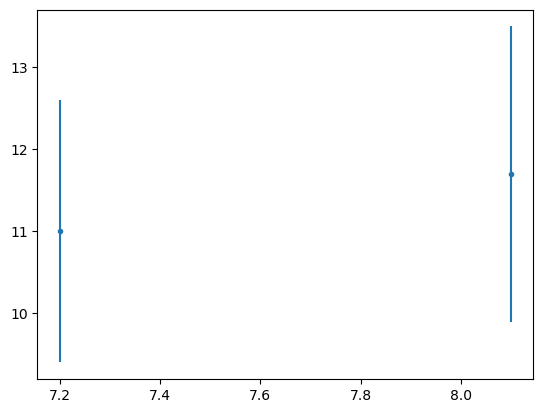

In [5]:
x = np.array([7.2, 8.1])
y = np.array([11, 11.7])
e = np.array([1.6, 1.8]) # error

plt.errorbar(x, y, yerr = e, ls = "", marker = ".")


¿Qué diferencia nota? ¿A qué se debe esta diferencia?


### **$\cdot$ Pregunta B.3 (0.3 puntos)**

En la práctica, lo que deseamos es obtener la distribución de $y$ para un $\boldsymbol{x}$ nuevo dados los datos que usamos para entrenar y los supuestos que hicimos. En otras palabras, lo que queremos es $p(y|\boldsymbol{x}, \{\boldsymbol{x}_i,y_i\}_{i=1}^N, \boldsymbol{\mu}_\theta, C_\theta, C)$. Para calcular esta distribución, podemos marginalizar sobre $\boldsymbol{\theta}$:

$p(y|\boldsymbol{x}, \{\boldsymbol{x}_i,y_i\}_{i=1}^N, \boldsymbol{\mu}_\theta, C_\theta, C) = \int p(y|\boldsymbol{x}, \boldsymbol{\theta}, C) p(\boldsymbol{\theta}|\{\boldsymbol{x}_i,y_i\}_{i=1}^N, \boldsymbol{\mu}_\theta, C_\theta, C)d\boldsymbol{\theta}$.

Demuestre que

$p(y|\boldsymbol{x}, \{\boldsymbol{x}_i,y_i\}_{i=1}^N, \boldsymbol{\mu}_\theta, C_\theta, C) \sim N(y|\boldsymbol{\mu}_N^T\phi(\boldsymbol{x}), \sigma^2_N(\boldsymbol{x}))$,

donde

$\phi(\boldsymbol{x}) = \begin{pmatrix}
g_1(\boldsymbol{x})\\
g_2(\boldsymbol{x})\\
\vdots\\
g_k(\boldsymbol{x})
\end{pmatrix}$,

$\sigma^2_N(\boldsymbol{x}) = \sigma^2(\boldsymbol{x}) + \phi(\boldsymbol{x})^TC_N\phi(\boldsymbol{x})$,

y donde $\sigma^2(\boldsymbol{x})$ es el ruido de $y(\boldsymbol{x})$.